WARNING *** file size (27502) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
            Rate, %
Month              
1953-04-01     2.83
1953-05-01     3.05
1953-06-01     3.11
1953-07-01     2.93
1953-08-01     2.95
1953-09-01     2.87
1953-10-01     2.66
1953-11-01     2.68
1953-12-01     2.59
1954-01-01     2.48
(647, 1)
Rate, %    float64
dtype: object


<AxesSubplot:title={'center':'DF Over Time'}, xlabel='Month'>

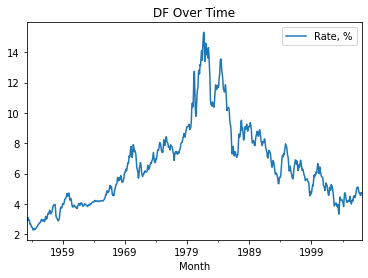

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa import holtwinters as hw

# datetime should always be index 0, values index 1
# date_gran = 'Month' # date granularity 
df = pd.read_excel('~\Downloads\Securities.xls')
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])
df.set_index(df.iloc[:,0].name, inplace=True)
print(df.head(10))
print(df.shape) # index changes from 0:1 to 0:0 due to set_index()
print(df.dtypes)

df.plot(title='DF Over Time')

### Analysis on decomposing
the time series down to individual components

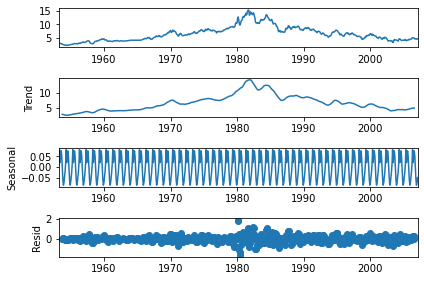

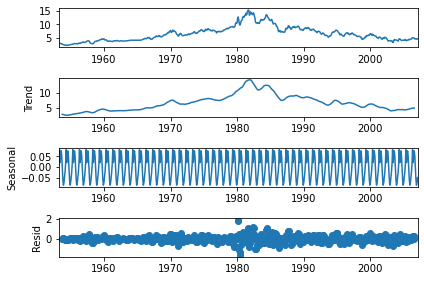

In [51]:
# showcasing the decomposition of plot
decomp = sd(df, model='additive')
decomp.plot()

#### What does the decomp plot say?
... fill in here
All should check againt additive and multiplicative


In [52]:
# set frequency, if by day, week, month, year
df.index.freq = 'MS' # monthly granularity
m = 12
alpha = 1/(2*m)

### Now fitting HW exponential smoothing


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Rate, %   No. Observations:                  647
Model:             SimpleExpSmoothing   SSE                            732.674
Optimized:                      False   AIC                             84.457
Trend:                           None   BIC                             93.402
Seasonal:                        None   AICC                            84.520
Seasonal Periods:                None   Date:                 Sun, 17 Mar 2024
Box-Cox:                        False   Time:                         09:02:50
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0416667                alpha                False
initial_level              2.8300000                

c:\Users\Shoya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Month'>

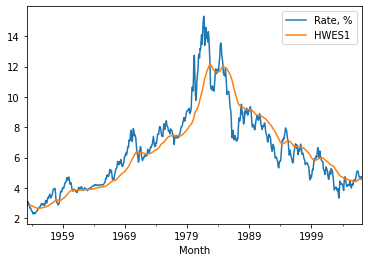

In [56]:
# Simple exponential smoothing
model =  hw.SimpleExpSmoothing(df.iloc[:,0]).fit(smoothing_level=alpha, optimized=False, use_brute=True)
print(model.summary())

df['HWES1'] = model.fittedvalues
df.plot()

In [ ]:
# Exponential Smoothing
